**Stephen Jasper - 2301869853**

##Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import timeit

##Load Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

##Split the data to train, test, and validate dataset

In [3]:
X_train, X_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

**Reshape for CNN model**

In [4]:
img_row = 28
img_col = 28
input_shape = (img_row, img_col, 1)

X_train = X_train.reshape(X_train.shape[0], img_row, img_col, 1)
X_test = x_test.reshape(x_test.shape[0], img_row, img_col, 1)
X_validate = X_validate.reshape(X_validate.shape[0], img_row, img_col, 1)

print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'x_validate shape: {X_validate.shape}')

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


**Pre-processing for y data**

In [5]:
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(y_test, 10)

##Implement of CNN model

**Using 2D convolutional**

In [6]:
CNN_Mnist = Sequential()
CNN_Mnist.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#32 filter, with 1 filter of size 3*3
CNN_Mnist.add(Dropout(0.2))
CNN_Mnist.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#64 filter, with 1 filter of size 3*3
CNN_Mnist.add(MaxPooling2D(pool_size=(2, 2)))
#Pooling to reduce dimensionality from featured map and avoid of overfitting.
CNN_Mnist.add(Dropout(0.3))
#Flatten is a proses to change the data from 2D to vector
CNN_Mnist.add(Flatten())
#dense = fully connected layer
CNN_Mnist.add(Dense(64, activation='relu'))
CNN_Mnist.add(Dense(128, activation='relu'))
CNN_Mnist.add(Dense(10, activation='softmax'))

In [7]:
#To see the performance of the model
CNN_Mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [8]:
CNN_Mnist.compile(optimizer= Adam(lr= 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


##Test the accuracy score for CNN model

In [9]:
start1 = timeit.default_timer()
history = CNN_Mnist.fit(X_train, y_train, batch_size= 300, epochs=50, validation_data=(X_validate, y_validate))
end1 = timeit.default_timer()

Epoch 1/50
160/160 [==============================] - 6s 18ms/step - loss: 1.0145 - accuracy: 0.7626 - val_loss: 0.4243 - val_accuracy: 0.8540
Epoch 2/50
160/160 [==============================] - 3s 16ms/step - loss: 0.3935 - accuracy: 0.8587 - val_loss: 0.3446 - val_accuracy: 0.8788
Epoch 3/50
160/160 [==============================] - 3s 17ms/step - loss: 0.3332 - accuracy: 0.8764 - val_loss: 0.3120 - val_accuracy: 0.8876
Epoch 4/50
160/160 [==============================] - 3s 16ms/step - loss: 0.2964 - accuracy: 0.8906 - val_loss: 0.2910 - val_accuracy: 0.8962
Epoch 5/50
160/160 [==============================] - 3s 17ms/step - loss: 0.2684 - accuracy: 0.8999 - val_loss: 0.2753 - val_accuracy: 0.9002
Epoch 6/50
160/160 [==============================] - 3s 16ms/step - loss: 0.2486 - accuracy: 0.9069 - val_loss: 0.2626 - val_accuracy: 0.9042
Epoch 7/50
160/160 [==============================] - 3s 17ms/step - loss: 0.2302 - accuracy: 0.9159 - val_loss: 0.2526 - val_accuracy: 0.9088

In [10]:
score = CNN_Mnist.evaluate(X_test, y_test, verbose=0)
print('Accuracy score for CNN -> mnist')
print('Accuracy:', score[1]*100, '%')
print(f'Time without PCA -> {end1 - start1}')

Accuracy score for CNN -> mnist
Accuracy: 91.26999974250793 %
Time without PCA -> 142.388363025


##Implement the CNN + PCA model

**Image sample before PCA**

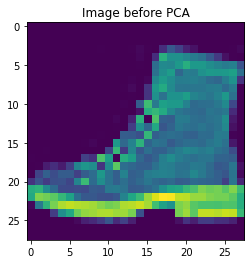

In [11]:
plt.title('Image before PCA')
plt.imshow(X_train[20].reshape(28,28))

**Reshape to 2D for PCA dimentional reduction**

In [12]:
img_row = 28
img_col = 28
input_shape = (img_row, img_col, 1)
#28 x 28 = 784
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = x_test.reshape(x_test.shape[0], 784)
X_validate = X_validate.reshape(X_validate.shape[0], 784)

print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'x_validate shape: {X_validate.shape}')

x_train shape: (48000, 784)
x_test shape: (10000, 784)
x_validate shape: (12000, 784)


**Using PCA to reduce the dimentions**

In [13]:
pca = PCA(n_components = 400)
pca_x_train = pca.fit_transform(X_train)
pca_x_test = pca.transform(X_test)
pca_x_validate = pca.transform(X_validate)

pca_x_train = pca.inverse_transform(pca_x_train)
pca_x_test = pca.inverse_transform(pca_x_test)
pca_x_validate = pca.inverse_transform(pca_x_validate)

**Reshape again for CNN model**

In [14]:
X_train = pca_x_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = pca_x_test.reshape(x_test.shape[0], 28, 28, 1)
X_validate = pca_x_validate.reshape(X_validate.shape[0], 28, 28, 1)

print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'x_validate shape: {X_validate.shape}')

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


**Image sample after PCA**

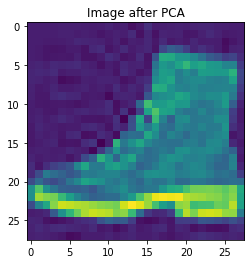

In [15]:
plt.title('Image after PCA')
plt.imshow(X_train[20].reshape(28,28))

##Build the CNN with PCA model

In [16]:
CNNmodel = Sequential()
CNNmodel.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel.add(Conv2D(32, kernel_size=3, activation='relu'))
CNNmodel.add(Dropout(0.2))
CNNmodel.add(Dropout(0.3))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(64, activation='relu')) 
CNNmodel.add(Dense(128, activation='relu'))
CNNmodel.add(Dense(10, activation='softmax'))

**To see the performance of the model**

In [17]:
CNNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [18]:
CNNmodel.compile(optimizer= Adam(lr= 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**Train the model for CNN + PCA model**

In [19]:
start2 = timeit.default_timer()
history = CNNmodel.fit(X_train, y_train, batch_size= 300, epochs=50, validation_data=(X_validate, y_validate))
end2 = timeit.default_timer()

Epoch 1/50
160/160 [==============================] - 2s 11ms/step - loss: 0.8643 - accuracy: 0.7511 - val_loss: 0.3948 - val_accuracy: 0.8595
Epoch 2/50
160/160 [==============================] - 2s 10ms/step - loss: 0.4171 - accuracy: 0.8468 - val_loss: 0.3509 - val_accuracy: 0.8739
Epoch 3/50
160/160 [==============================] - 2s 10ms/step - loss: 0.3765 - accuracy: 0.8586 - val_loss: 0.3301 - val_accuracy: 0.8780
Epoch 4/50
160/160 [==============================] - 2s 10ms/step - loss: 0.3361 - accuracy: 0.8731 - val_loss: 0.3017 - val_accuracy: 0.8903
Epoch 5/50
160/160 [==============================] - 2s 10ms/step - loss: 0.3178 - accuracy: 0.8823 - val_loss: 0.3138 - val_accuracy: 0.8854
Epoch 6/50
160/160 [==============================] - 2s 11ms/step - loss: 0.2939 - accuracy: 0.8896 - val_loss: 0.2789 - val_accuracy: 0.8985
Epoch 7/50
160/160 [==============================] - 2s 10ms/step - loss: 0.2772 - accuracy: 0.8955 - val_loss: 0.2793 - val_accuracy: 0.8997

##Test the accuracy score for CNN + PCA

In [20]:
scorePCA = CNNmodel.evaluate(X_test, y_test, verbose=0)
print('Accuracy score for CNN + PCA -> mnist')
print('Test accuracy:', scorePCA[1]*100, '%')
print(f'Time with PCA -> {end2 - start2}')

Accuracy score for CNN + PCA -> mnist
Test accuracy: 91.18000268936157 %
Time with PCA -> 86.228637402
